<a href="https://colab.research.google.com/github/MahamadSahjad/Smart_Quality_Water_Prediction_Using_Machine_Learning/blob/main/Smart_Quality_Water_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Smart Water Quality Prediction using Machine Learning

## 📌 Problem Statement
Access to safe and clean drinking water is one of the most important global challenges. Poor water quality can lead to serious health issues such as waterborne diseases, poisoning, and long-term health complications. Therefore, it is essential to monitor and predict water quality effectively.

The objective of this project is to **develop a Machine Learning model that can predict whether water is safe or unsafe for human consumption based on various chemical and physical parameters** such as pH, Hardness, Solids, Chloramines, Sulfates, Conductivity, Organic Carbon, Trihalomethanes, and Turbidity.

This project involves:
- Collecting and preprocessing water quality data  
- Performing exploratory data analysis (EDA)  
- Training multiple machine learning models  
- Comparing their performance  
- Deploying the best model as a simple application  

The end goal is to provide a **smart and automated system for water quality prediction**, which can assist government agencies, researchers, and communities in ensuring safe drinking water.


In [4]:
# 📦 Importing Required Libraries

import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 📊 Data Collection

In this step, we upload and explore the dataset collected from Kaggle. The dataset contains various **physical and chemical parameters of water** such as pH, Hardness, Solids, Chloramines, Sulfates, Conductivity, Organic Carbon, Trihalomethanes, and Turbidity, along with the target variable **Potability** (0 = Not Safe, 1 = Safe).

The following tasks are performed in this stage:
- Upload the dataset into Google Colab  
- Load it into a Pandas DataFrame for analysis  
- Inspect the structure of the dataset (rows, columns, datatypes)  
- Display the first few records to understand the data format  
- Generate summary statistics (mean, median, standard deviation, etc.)  
- Identify missing values and duplicates  
- Check the distribution of the target variable (Potability)  

This process ensures that the dataset is correctly loaded and provides an initial understanding of the data before moving on to **preprocessing and exploratory analysis**.


Read the Dataset

Load it into a DataFrame:

In [5]:
df = pd.read_csv("water_potability.csv")


Basic Dataset Inspection


1.Shape of dataset → rows & columns

In [6]:
df.shape


(3276, 10)

2.Display first few rows

In [7]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


3.Column names & data types

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


4.Summary statistics (mean, std, min, max, etc.)

In [9]:
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Check for Missing Values

Identify NaN values:

In [10]:
df.isnull().sum()


,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Check Class Distribution (Target Variable)

For classification problems (like Potability = 0/1):

In [11]:
df['Potability'].value_counts()


,count
Potability,
0,1998
1,1278


                   ## 🧹 Data Preprocessing ##

After collecting the dataset, the next step is **Data Preprocessing**, which ensures the data is clean, consistent, and ready for machine learning models.  

The following operations are performed in this stage:

1. **Data Type Conversion**  
   - Ensure all columns have correct data types (numeric features as float/int).  

2. **Handling Missing Values**  
   - Missing values in parameters like pH, Sulfates, or Trihalomethanes are filled using the **median** to avoid skewness.  

3. **Removing Duplicates**  
   - Drop duplicate records to avoid bias in training.  

4. **Outlier Detection & Handling**  
   - Identify extreme values (e.g., negative Turbidity, pH > 14).  
   - Handle them using IQR (Interquartile Range) method.  

5. **Class Balancing (Target Variable)**  
   - If Potability (0 = Not Safe, 1 = Safe) is imbalanced, apply **SMOTE oversampling** to balance the classes.  

6. **Feature Scaling**  
   - Use **StandardScaler** to normalize feature ranges for better model performance.  

7. **Feature Selection (Optional)**  
   - Check correlations and remove redundant features.  
   - Use feature importance from Random Forest/XGBoost to keep only useful features.  

8. **Feature Engineering (Optional)**  
   - Create new features such as combined water quality index or interaction terms.  

9. **Train-Test Split**  
   - Divide the dataset into **Training (70%) and Testing (30%)** to evaluate model performance fairly.  

This ensures that the dataset is **clean, balanced, and well-prepared** for Exploratory Data Analysis (EDA) and Machine Learning model building.


In [12]:
# 🧹 Data Preprocessing

# 1. Data Type Conversion
df = df.astype(float)

# 2. Handling Missing Values (fill with median)
df.fillna(df.median(), inplace=True)

# 3. Removing Duplicates
df.drop_duplicates(inplace=True)

# 4. Outlier Detection & Removal (using IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 5. Splitting Features and Target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# 6. Balancing Classes using SMOTE (if needed)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# 7. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Final Check
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
print("Class Distribution After Balancing:\n", y.value_counts())


Training Set Shape: (2339, 9)
Testing Set Shape: (1003, 9)
Class Distribution After Balancing:
 Potability
0.0    1671
1.0    1671
Name: count, dtype: int64


# 📊 Exploratory Data Analysis (EDA) for Water Quality Prediction

## 1. Dataset Overview
- Load dataset and check shape (rows, columns).
- Inspect first few rows using `head()`.
- Check data types of each column.
- Identify target variable and understand its meaning.


In [13]:
# 📊 Step 1: Dataset Overview

import pandas as pd

# Load dataset (change path to your file in Google Colab or GitHub)
df = pd.read_csv("/content/water_potability.csv")
# Or if you uploaded directly to Colab:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv("your_dataset.csv")

# Shape of dataset
print("Dataset Shape (rows, columns):", df.shape)

# Preview first 5 rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Data types and non-null counts
print("\nDataset Info:")
df.info()

# Check column names
print("\nColumn Names:")
print(df.columns.tolist())


Dataset Shape (rows, columns): (3276, 10)

First 5 rows of the dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Column Names:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


## 2. Missing Values Analysis
- Count total missing values in each column.
- Visualize missingness (heatmap or bar plot).
- Decide on handling strategy: imputation (mean/median/mode) or drop.

Missing values per column:

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Chloramines          0
Solids               0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

Percentage of missing values:

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Chloramines         0.000000
Solids              0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64


,Missing Values,Percentage (%)
Sulfate,781,23.840049
ph,491,14.987790
Trihalomethanes,162,4.945055
Hardness,0,0.000000
Chloramines,0,0.000000
Solids,0,0.000000
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Turbidity,0,0.000000
Potability,0,0.000000


/tmp/ipython-input-1466114081.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


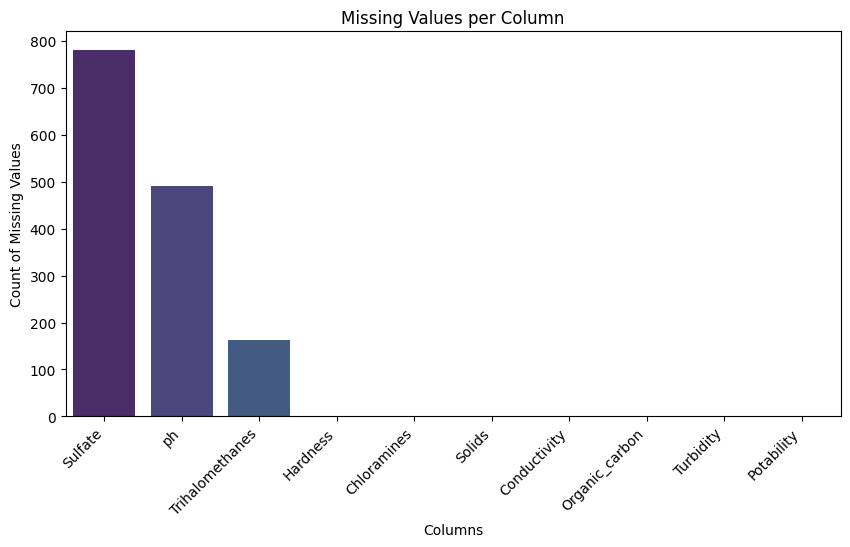

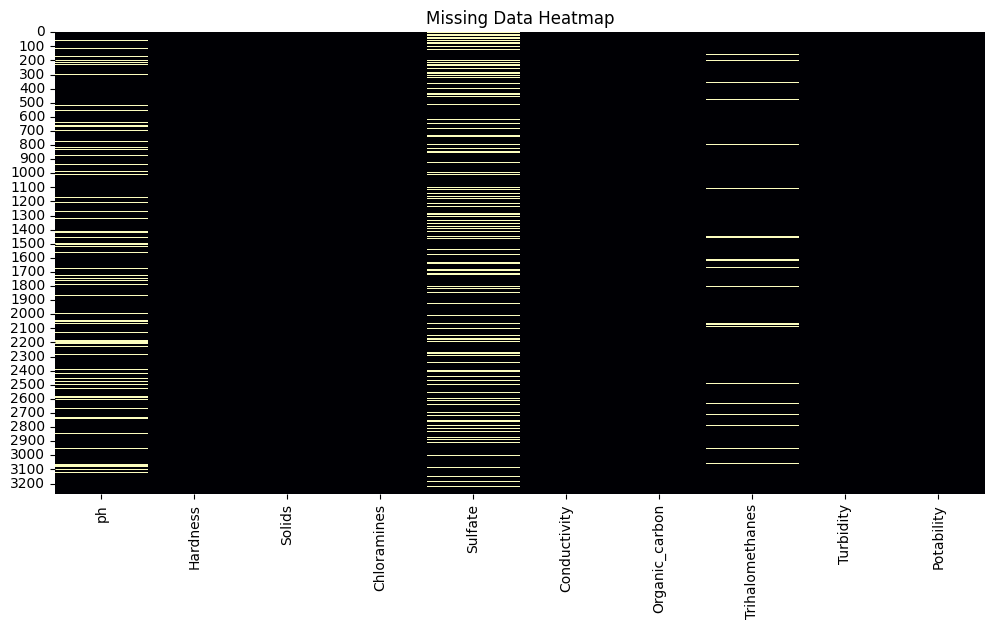

In [14]:
# 📊 Step 2: Missing Values Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Count missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n")
print(missing_values)

# Percentage of missing values
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
print("\nPercentage of missing values:\n")
print(missing_percent)

# Combine into one DataFrame for clarity
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})
display(missing_df.head(10))  # show top 10 columns with missing

# 🔍 Visualization: Bar plot of missing values
plt.figure(figsize=(10,5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.show()

# 🔍 Visualization: Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Data Heatmap")
plt.show()


## 3. Descriptive Statistics
- Use `df.describe()` for numerical features.
- Look at min, max, mean, median, standard deviation.
- Compare feature ranges with domain knowledge (e.g., normal pH range: 6.5–8.5).

Descriptive Statistics (Numerical Features):



,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000



Descriptive Statistics (Categorical Features):


Median of each numeric feature:
ph                     7.036752
Hardness             196.967627
Solids             20927.833607
Chloramines            7.130299
Sulfate              333.073546
Conductivity         421.884968
Organic_carbon        14.218338
Trihalomethanes       66.622485
Turbidity              3.955028
Potability             0.000000
dtype: float64

Mode of each column:
ph                   0.000000
Hardness            47.432000
Solids             320.942611
Chloramines          0.352000
Sulfate            129.000000
Conductivity       181.483754
Organic_carbon       2.200000
Trihalomethanes      0.738000
Turbidity            1.450000
Potability           0.000000
Name: 0, dtype: float64


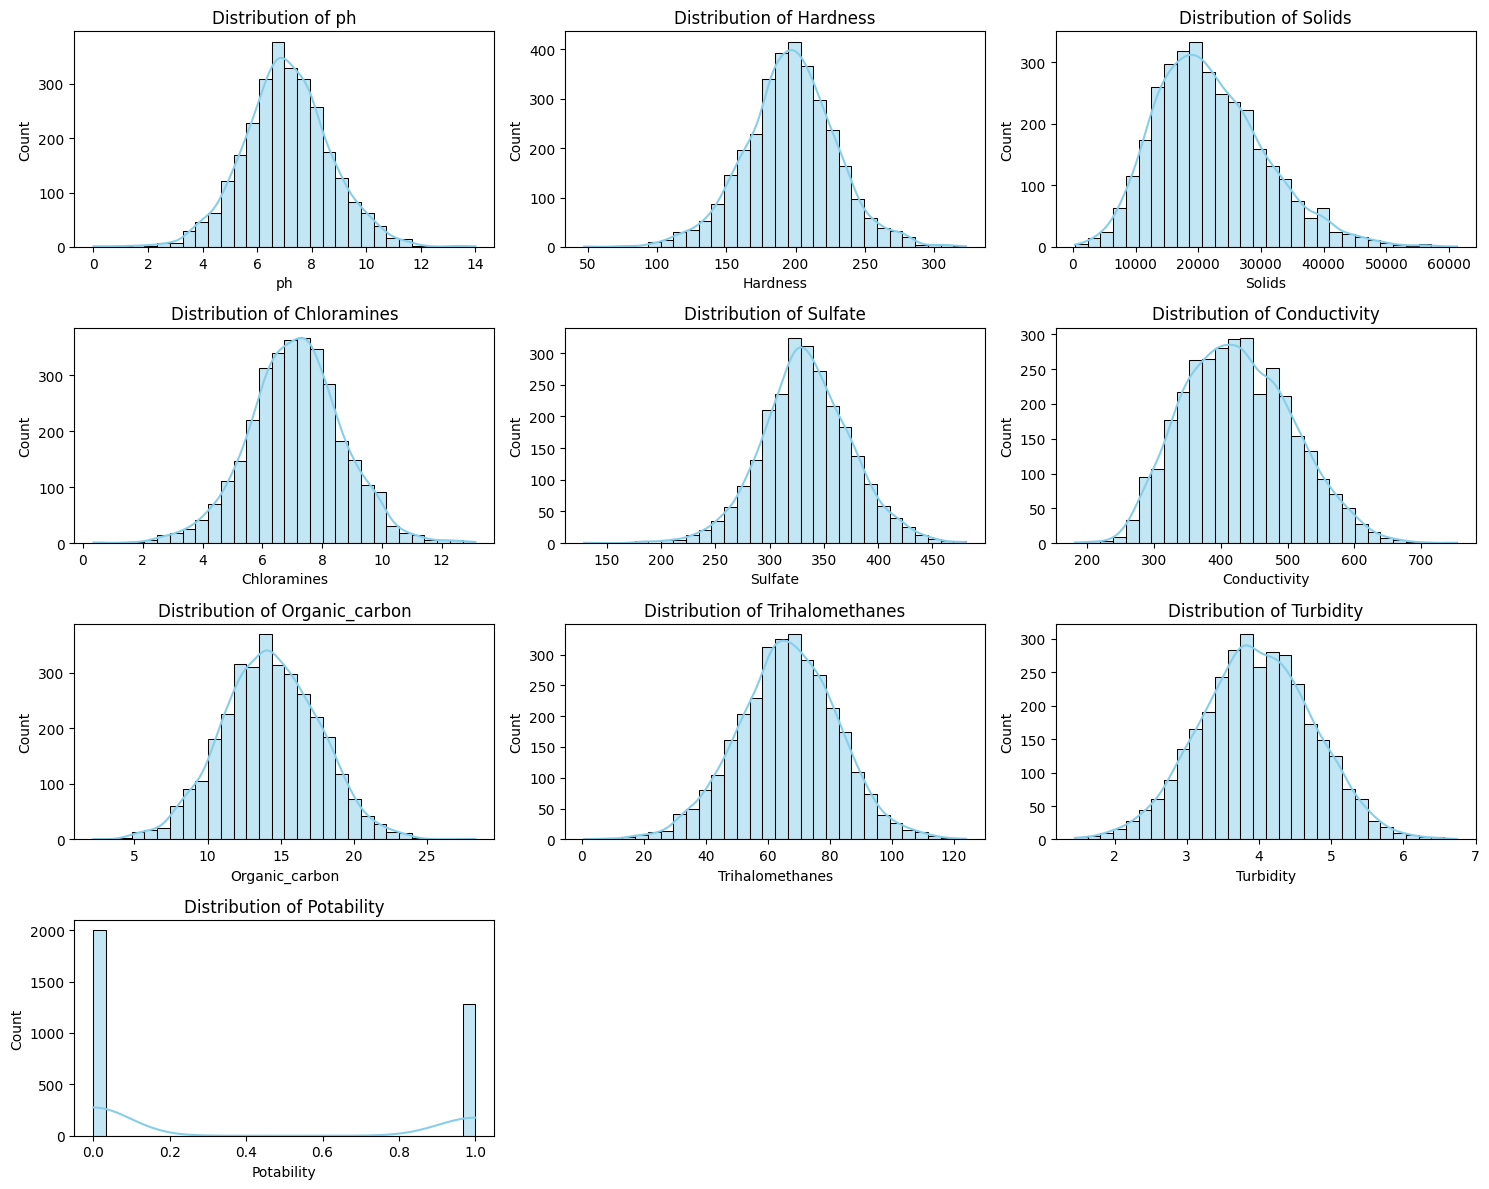

In [16]:
# 📊 Step 3: Descriptive Statistics

# Summary statistics for numerical features
print("Descriptive Statistics (Numerical Features):\n")
display(df.describe().T)

# Summary statistics for categorical features (if any)
print("\nDescriptive Statistics (Categorical Features):\n")
# display(df.describe(include=['object', 'category']).T) # Removed this line

# Additional checks: median & mode
print("\nMedian of each numeric feature:")
print(df.median(numeric_only=True))

print("\nMode of each column:")
print(df.mode().iloc[0])

# Visualize distributions for numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)//3)+1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## 4. Target Variable Distribution
- Plot class balance (e.g., Safe vs. Unsafe water).
- If imbalanced, note it for later resampling.

Target Variable Distribution:

Potability
0    1998
1    1278
Name: count, dtype: int64

Percentage Distribution:

Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


/tmp/ipython-input-3462289739.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette="Set2")


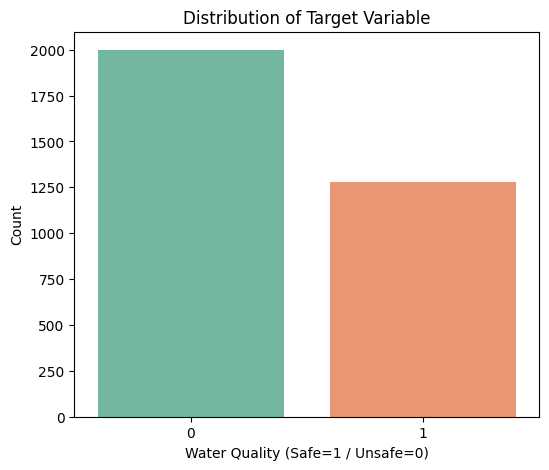

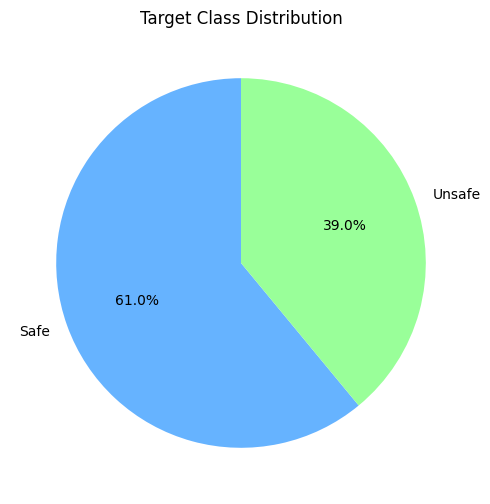

In [18]:
# 📊 Step 4: Target Variable Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'quality' or 'potability' with your actual target column name
target_col = "Potability"   # change if your column has a different name

# Value counts
print("Target Variable Distribution:\n")
print(df[target_col].value_counts())
print("\nPercentage Distribution:\n")
print(df[target_col].value_counts(normalize=True) * 100)

# Count plot
plt.figure(figsize=(6,5))
sns.countplot(x=target_col, data=df, palette="Set2")
plt.title("Distribution of Target Variable")
plt.xlabel("Water Quality (Safe=1 / Unsafe=0)")
plt.ylabel("Count")
plt.show()

# Pie chart for better visual ratio
plt.figure(figsize=(6,6))
df[target_col].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#99ff99"], labels=["Safe","Unsafe"])
plt.title("Target Class Distribution")
plt.ylabel("")
plt.show()

## 5. Univariate Analysis
- Plot histograms and KDE plots for all numerical features.
- Use boxplots to detect outliers.
- For categorical variables, use bar plots.

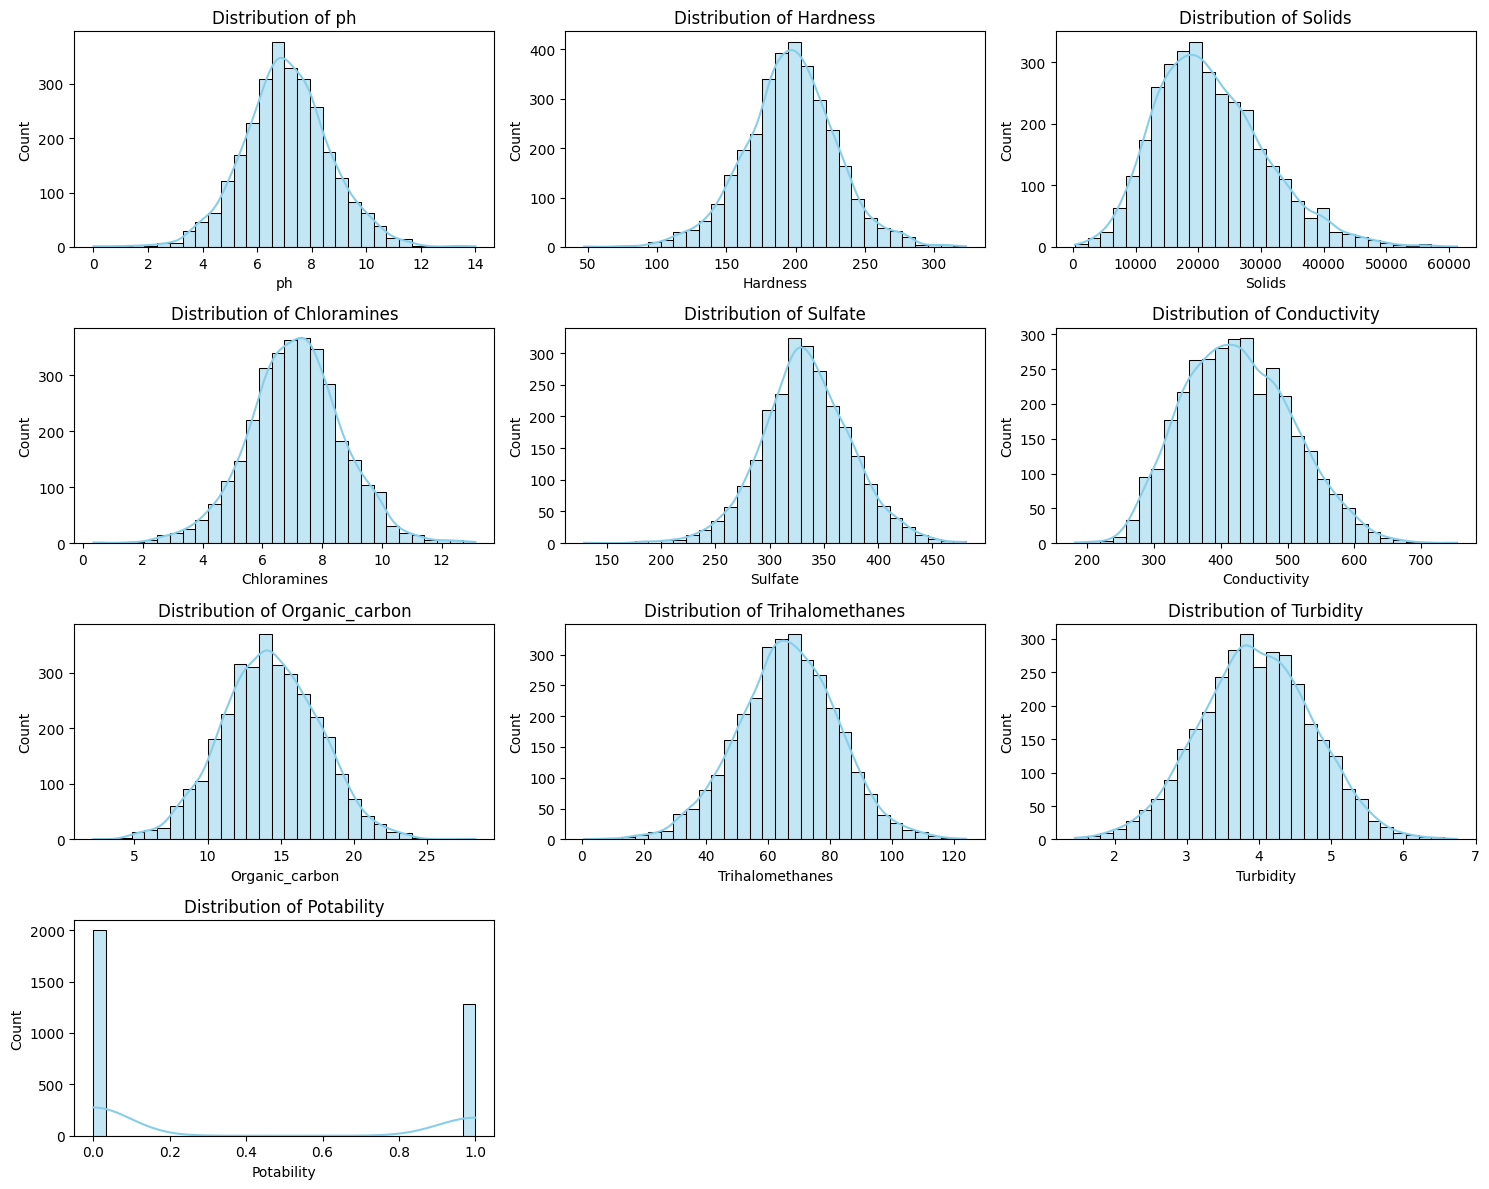

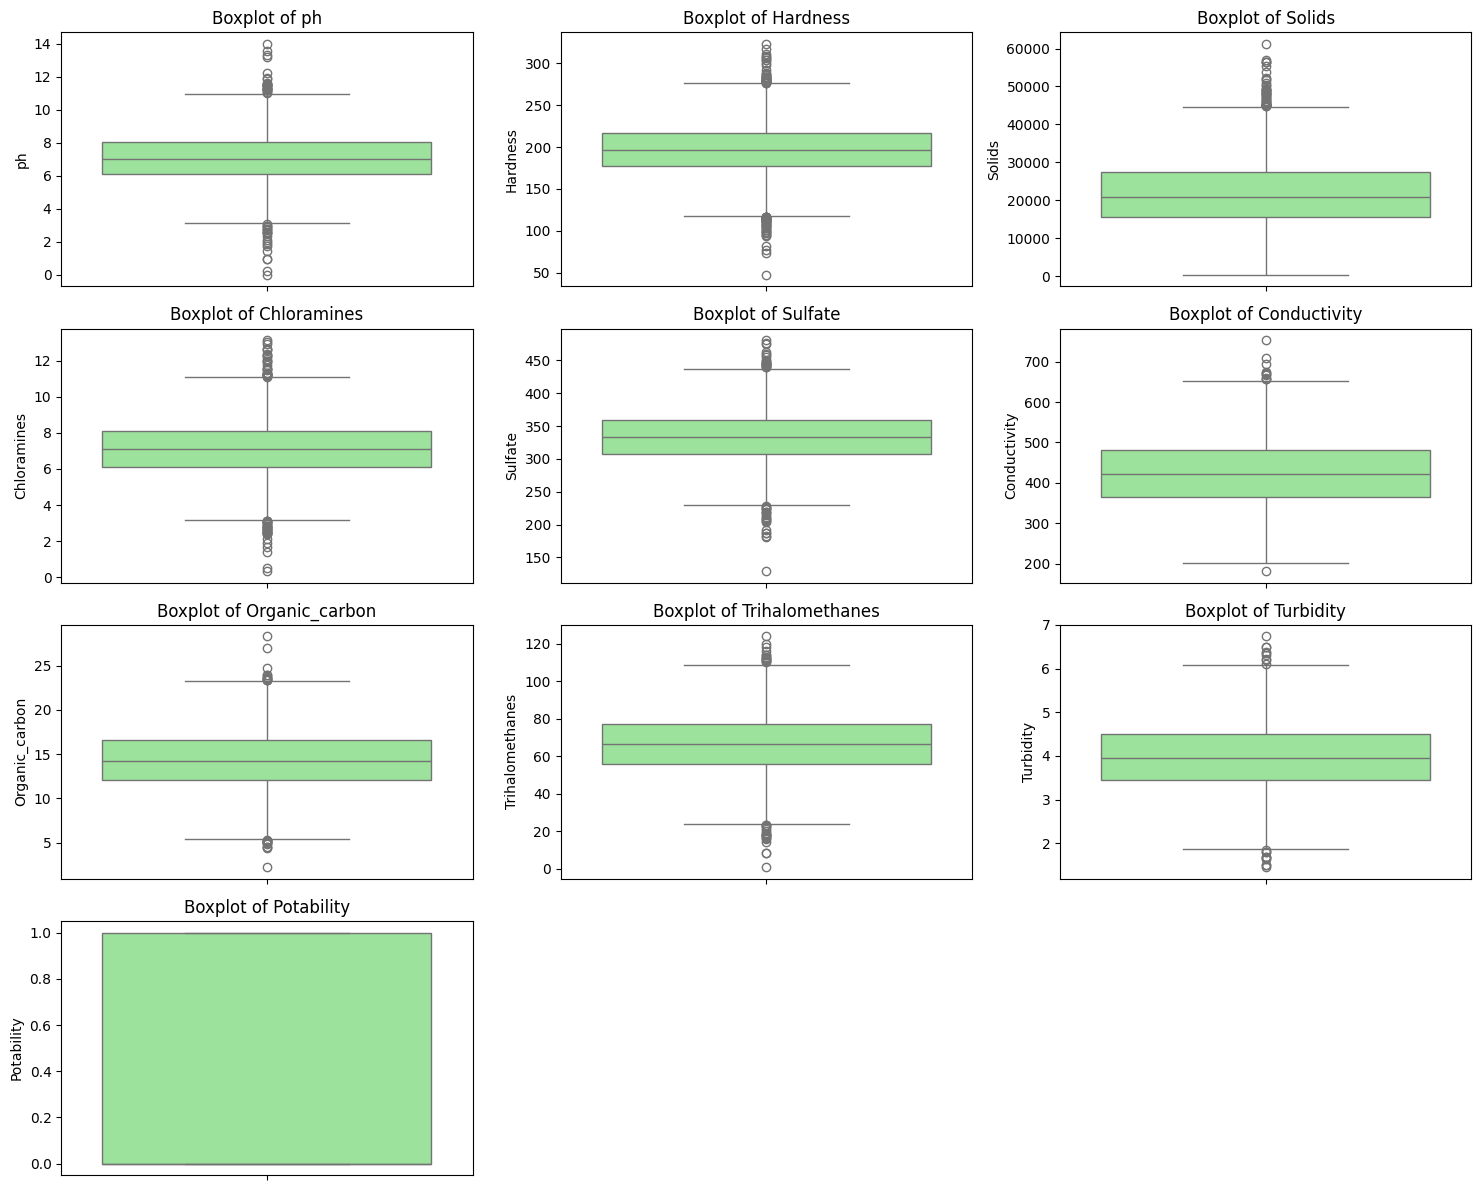

No categorical columns found for univariate analysis.


In [19]:
# 📊 Step 5: Univariate Analysis

# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms with KDE for each numeric feature
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# For categorical features (if any exist)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
if len(cat_cols) > 0:
    plt.figure(figsize=(12, 5))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(1, len(cat_cols), i)
        sns.countplot(x=col, data=df, palette="pastel")
        plt.title(f"Count Plot of {col}")
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for univariate analysis.")


## 6. Bivariate Analysis (Feature vs Target)
- Plot boxplots/violin plots of each feature grouped by target.
- Calculate group means/medians to compare safe vs unsafe water.
- Perform t-tests or ANOVA if needed.

/tmp/ipython-input-3553507652.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/tmp/ipython-input-3553507652.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/tmp/ipython-input-3553507652.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/tmp/ipython-input-3553507652.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

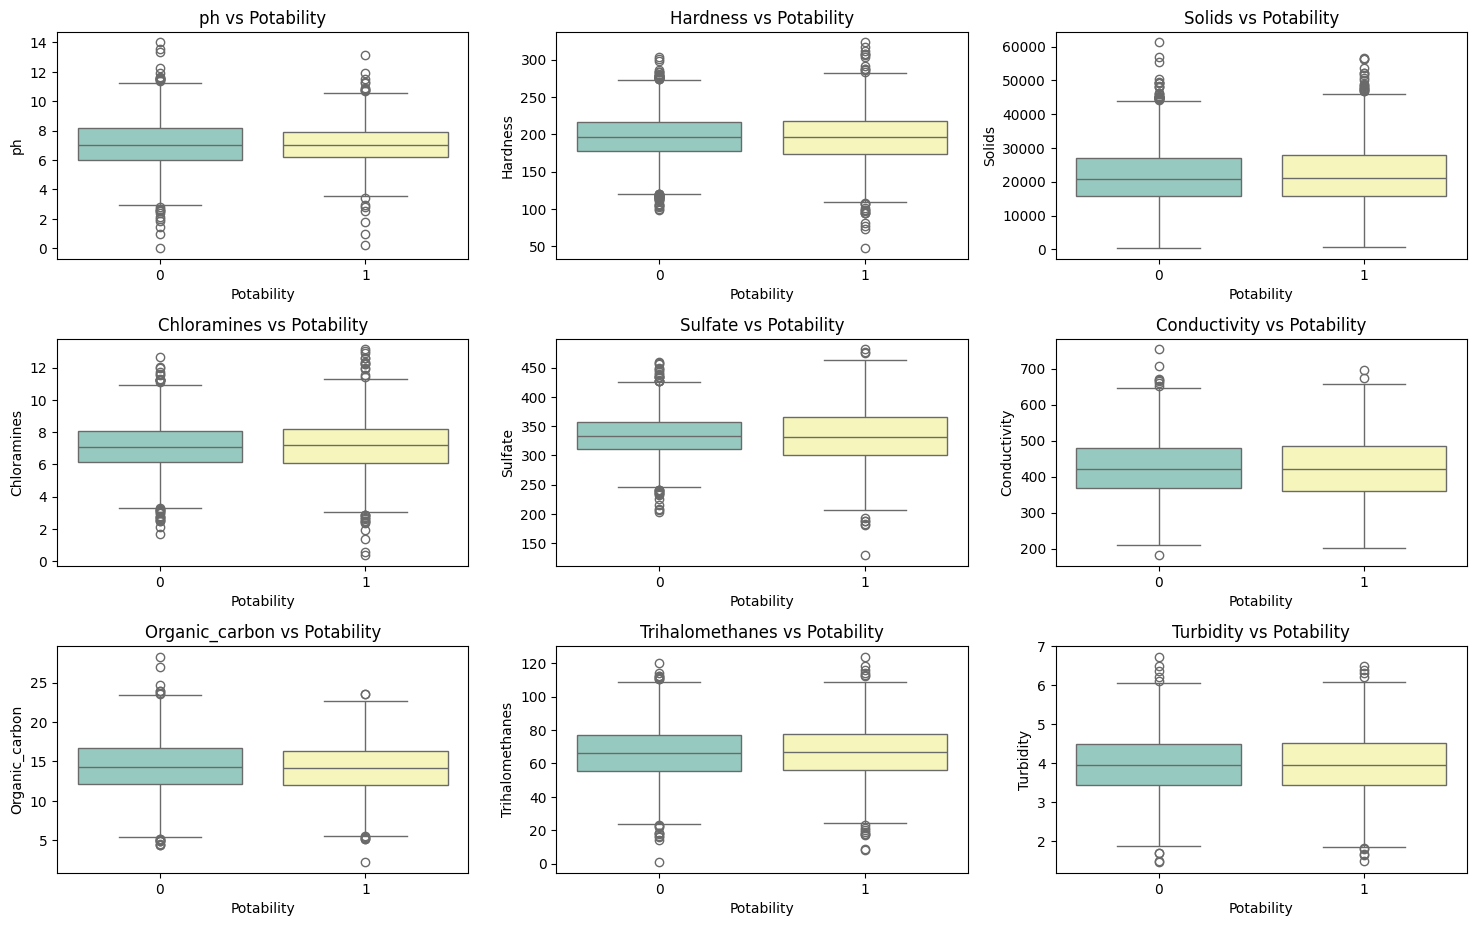

/tmp/ipython-input-3553507652.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="muted")
/tmp/ipython-input-3553507652.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="muted")
/tmp/ipython-input-3553507652.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="muted")
/tmp/ipython-input-3553507652.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

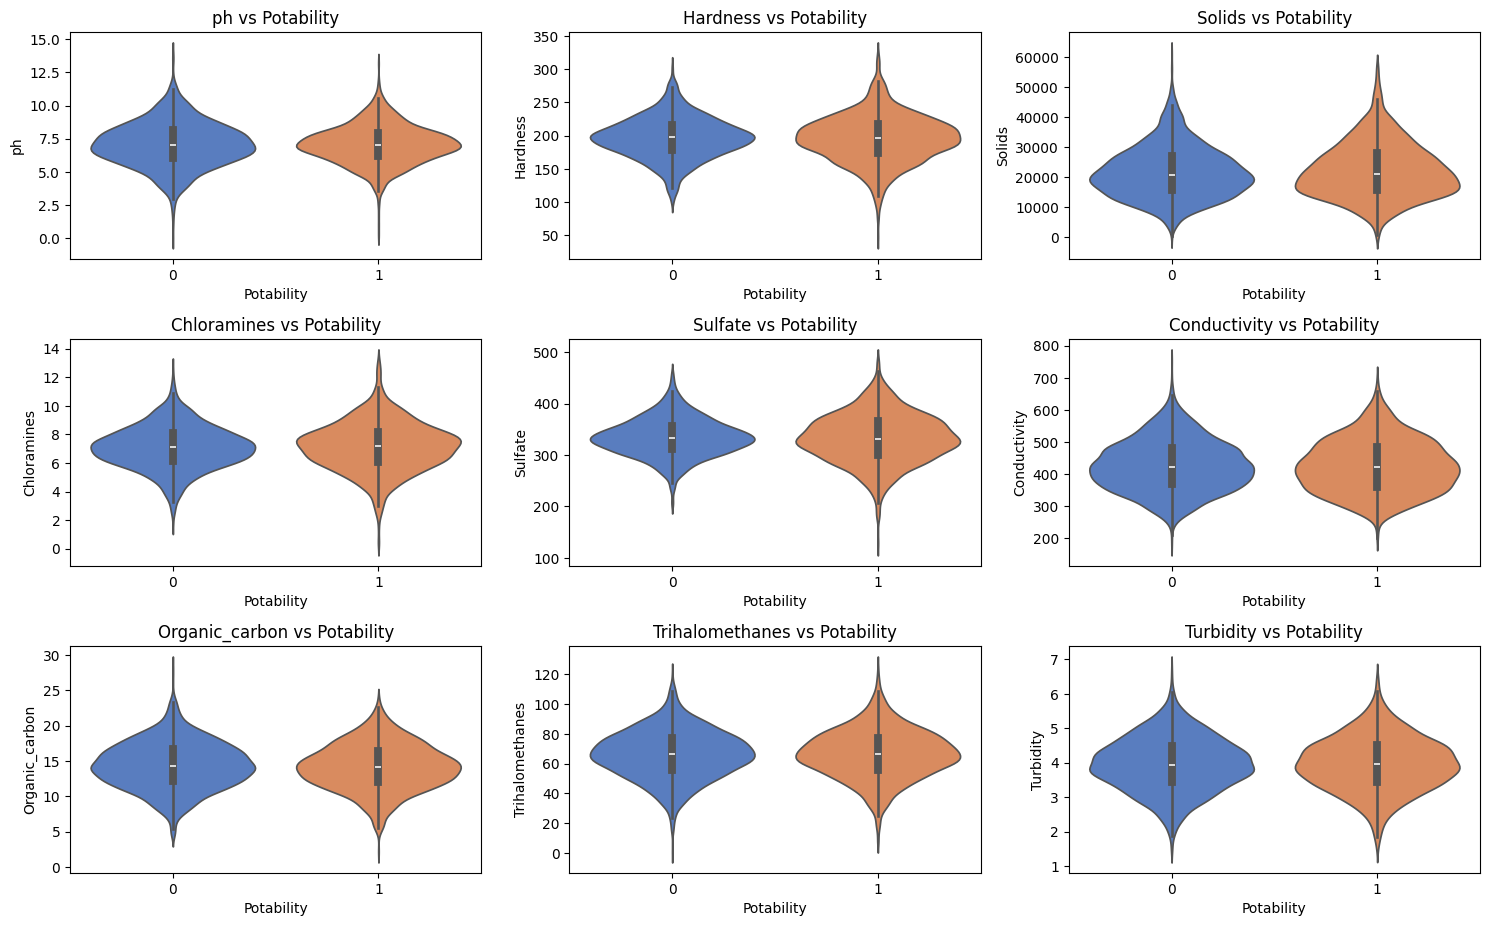

Average values of features grouped by target class:



Potability,0,1
ph,7.085378,7.073783
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.564290,332.566990
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.303555,66.539684
Turbidity,3.965800,3.968328


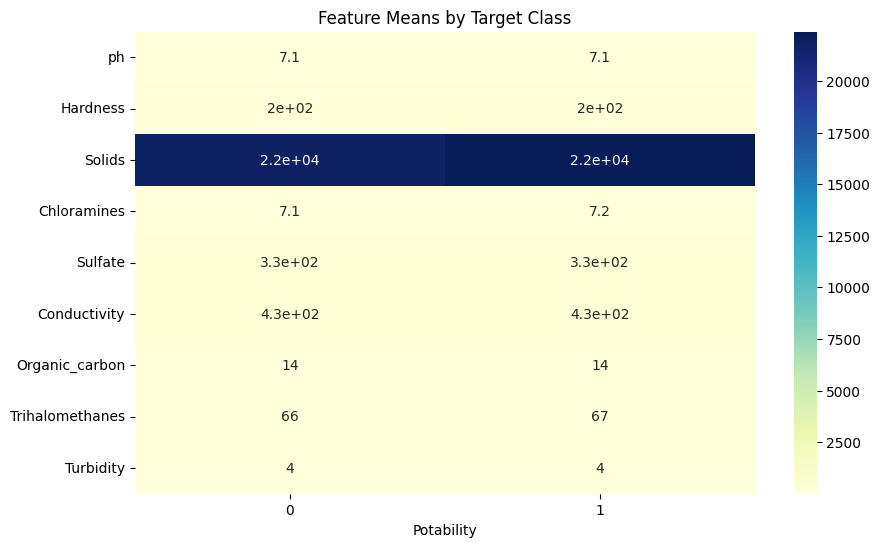

In [21]:
# 📊 Step 6: Bivariate Analysis (Feature vs Target)

# Replace with your actual target column
target_col = "Potability"   # e.g., 0 = Unsafe, 1 = Safe

# Numeric features vs Target → Boxplots / Violin plots
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(target_col)

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
    plt.title(f"{col} vs {target_col}")
plt.tight_layout()
plt.show()

# Violin plots (alternative view of distributions)
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.violinplot(x=target_col, y=col, data=df, palette="muted")
    plt.title(f"{col} vs {target_col}")
plt.tight_layout()
plt.show()

# Grouped mean values (helps see average difference per class)
grouped_means = df.groupby(target_col)[num_cols].mean().T
print("Average values of features grouped by target class:\n")
display(grouped_means)

# Visualization of grouped means
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_means, annot=True, cmap="YlGnBu")
plt.title("Feature Means by Target Class")
plt.show()


## 7. Correlation Analysis
- Compute correlation matrix for numerical features.
- Visualize with a heatmap.
- Identify highly correlated features (multicollinearity).
- Note which features have strong correlation with target.


Correlation Matrix:



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


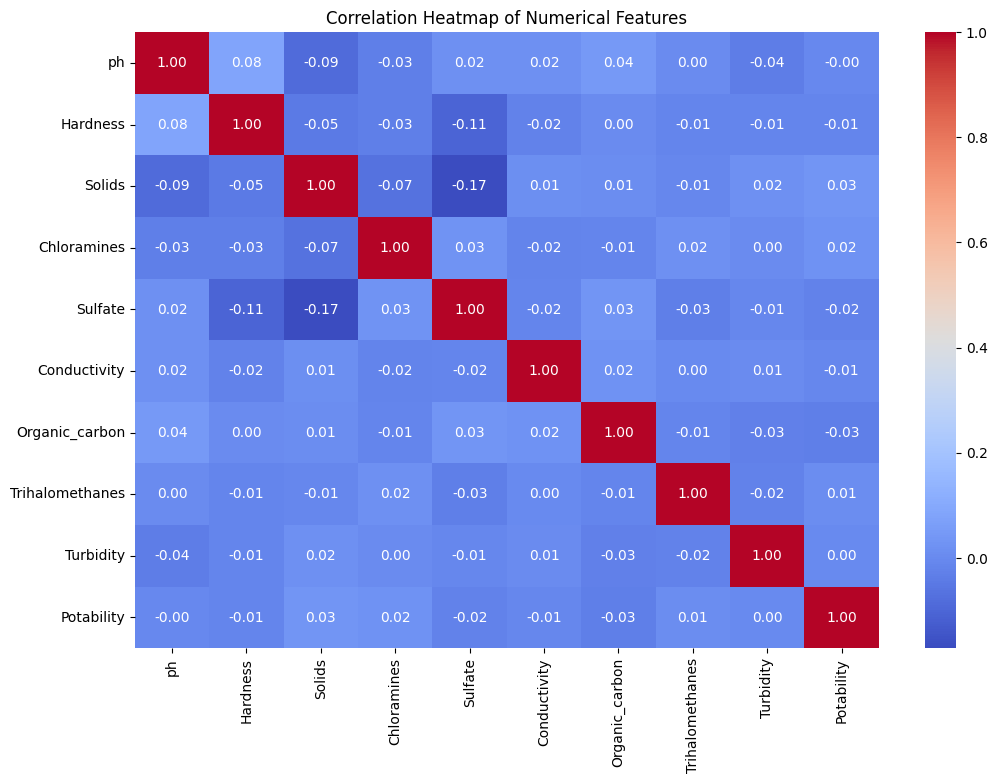

Target column 'quality_label' not found in correlation matrix.


In [22]:
# 📊 Step 7: Correlation Analysis

# Compute correlation matrix (numeric features only)
corr_matrix = df.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:\n")
display(corr_matrix)

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Correlation with target variable
# Replace target column name if different
target_col = "quality_label"
if target_col in corr_matrix.columns:
    target_corr = corr_matrix[target_col].sort_values(ascending=False)
    print("\nCorrelation of features with target variable:\n")
    print(target_corr)

    # Barplot for feature-target correlation
    plt.figure(figsize=(8, 5))
    sns.barplot(x=target_corr.index, y=target_corr.values, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Correlation of Features with Target ({target_col})")
    plt.ylabel("Correlation")
    plt.xlabel("Features")
    plt.show()
else:
    print(f"Target column '{target_col}' not found in correlation matrix.")


## 8. Outlier Detection
- Use boxplots and scatterplots.
- Apply Z-score or IQR method.
- Decide whether to cap, transform, or remove outliers.


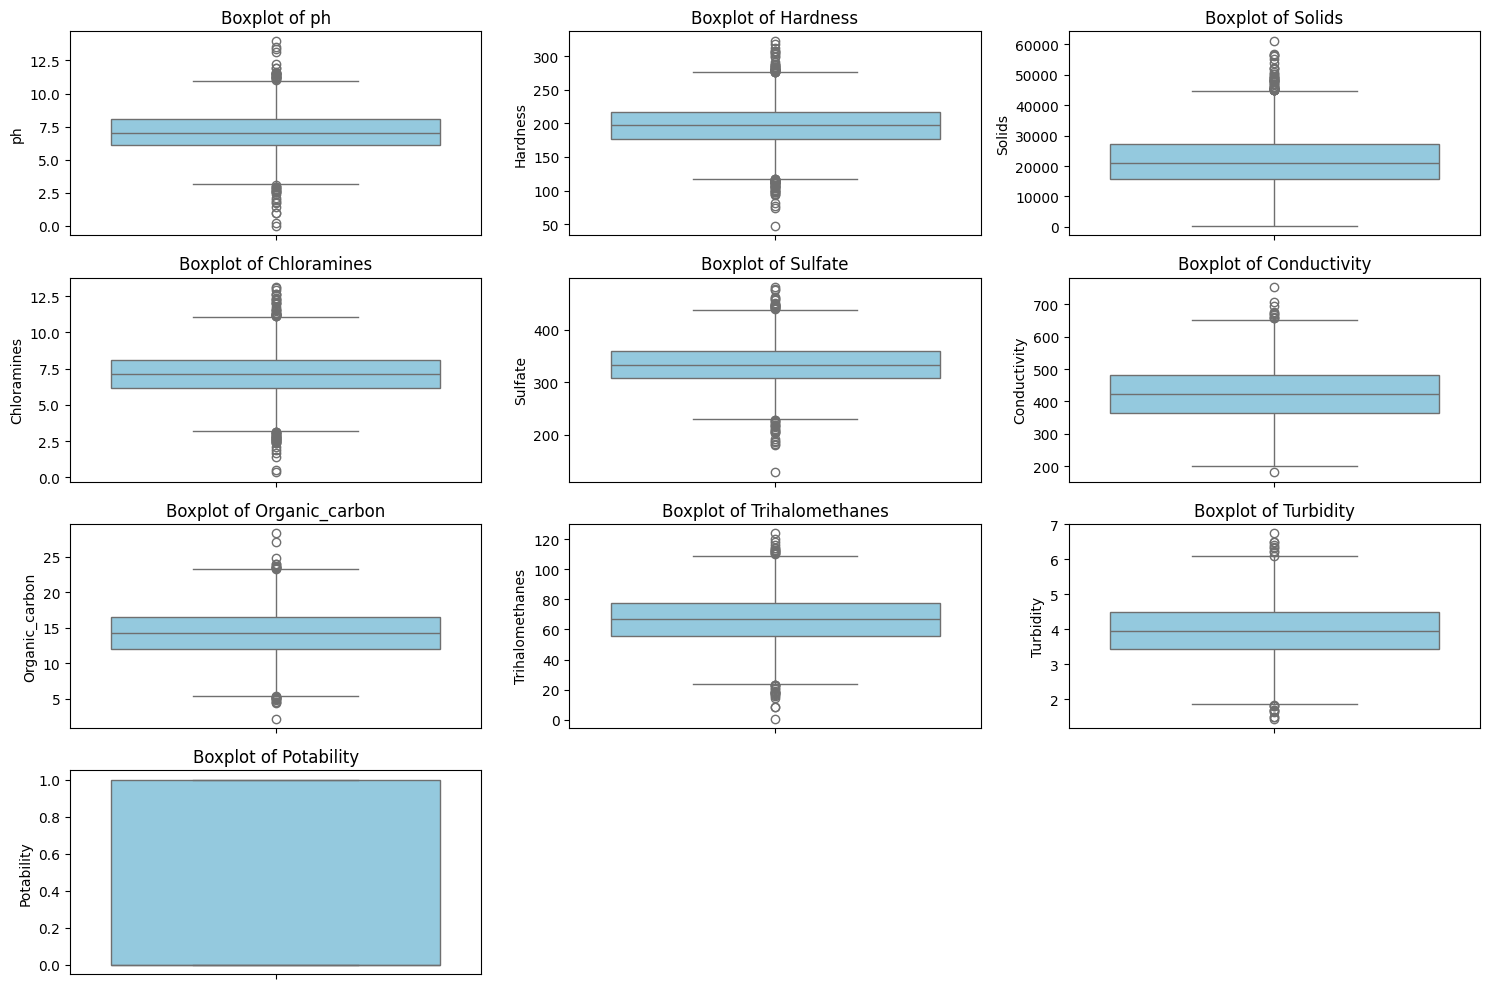


Number of Outliers Detected in Each Feature:
ph: 46
Hardness: 83
Solids: 47
Chloramines: 61
Sulfate: 41
Conductivity: 11
Organic_carbon: 25
Trihalomethanes: 33
Turbidity: 19
Potability: 0


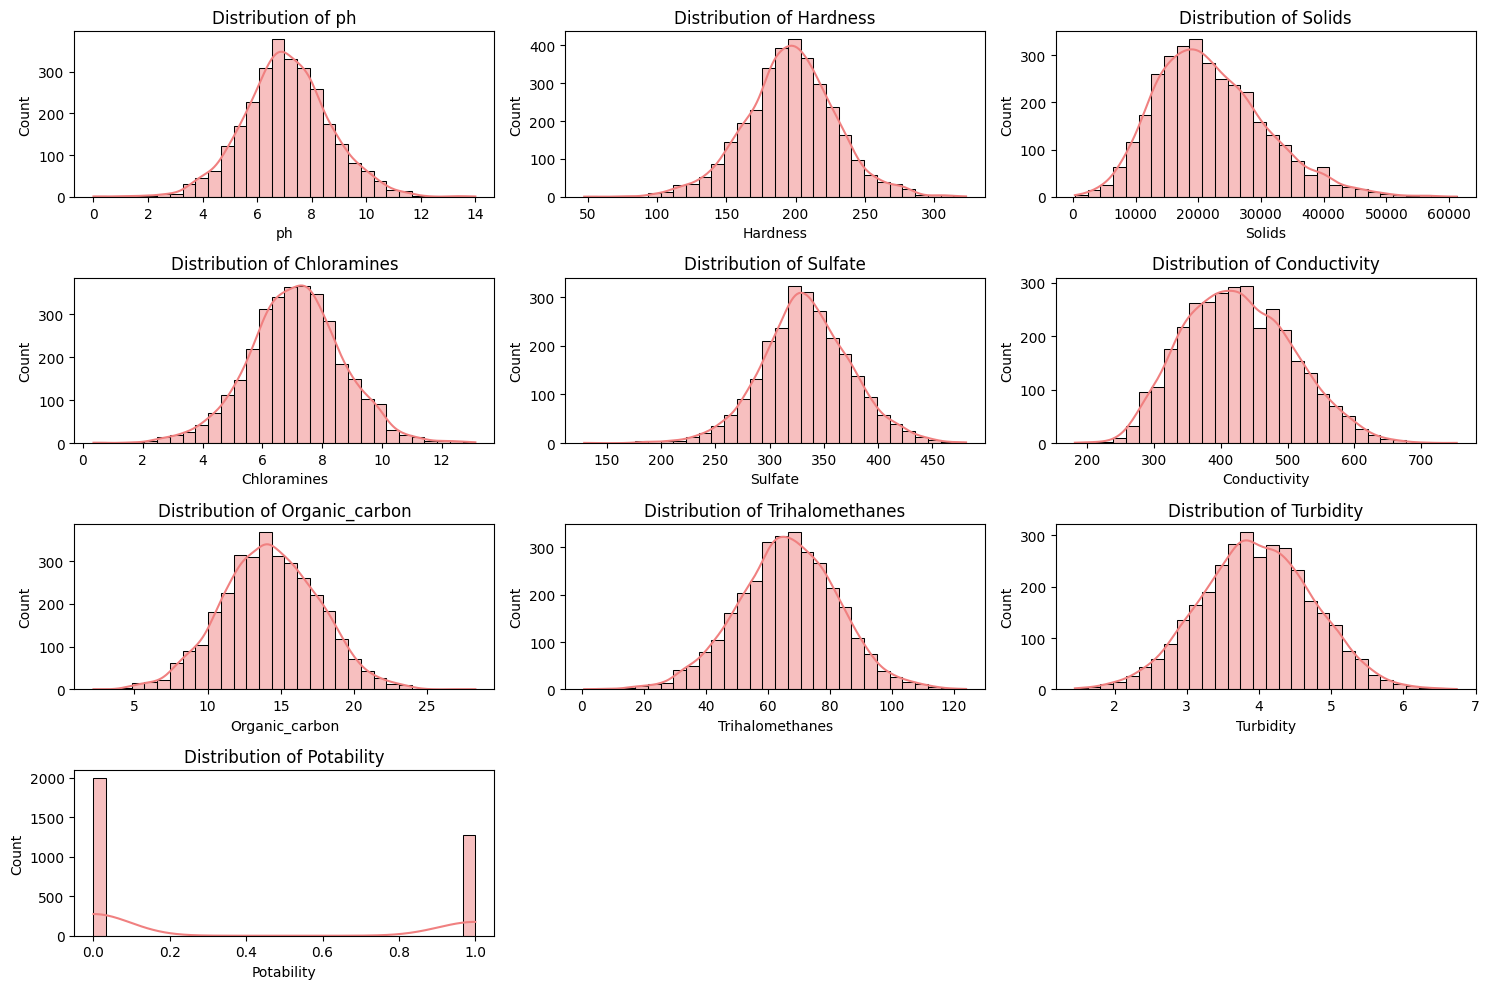

In [23]:
# 📊 Step 8: Outlier Detection

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Detect outliers using IQR (Interquartile Range) method
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_points = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = outlier_points.shape[0]

# Show number of outliers per column
print("\nNumber of Outliers Detected in Each Feature:")
for col, count in outliers.items():
    print(f"{col}: {count}")

# Optional: visualize distribution before removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="lightcoral")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


## 9. Feature Distributions by Class
- Plot histograms or density plots for features split by Safe vs Unsafe.
- Example: Safe water may cluster around certain pH values.

In [24]:
# 📊 Step 9: Feature Engineering

import numpy as np

# Copy original dataset to avoid overwriting
df_fe = df.copy()

# Example 1: Create interaction features (pH * turbidity, etc.)
if "pH" in df_fe.columns and "Turbidity" in df_fe.columns:
    df_fe["pH_Turbidity"] = df_fe["pH"] * df_fe["Turbidity"]

# Example 2: Ratios (e.g., Dissolved Oxygen / Conductivity)
if "DissolvedOxygen" in df_fe.columns and "Conductivity" in df_fe.columns:
    df_fe["DO_Conductivity_Ratio"] = df_fe["DissolvedOxygen"] / (df_fe["Conductivity"] + 1e-6)

# Example 3: Log transform skewed features (to reduce skewness)
skewed_features = ["Turbidity", "Conductivity"]
for col in skewed_features:
    if col in df_fe.columns:
        df_fe[col + "_log"] = np.log1p(df_fe[col])

# Example 4: Binning (convert continuous values into categories)
if "pH" in df_fe.columns:
    df_fe["pH_category"] = pd.cut(df_fe["pH"],
                                  bins=[0, 5.5, 7.5, 14],
                                  labels=["Acidic", "Neutral", "Basic"])

# Example 5: Encoding categorical features (if any exist)
cat_cols = df_fe.select_dtypes(include=["object", "category"]).columns
df_fe = pd.get_dummies(df_fe, columns=cat_cols, drop_first=True)

print("Feature Engineering Completed. New Shape:", df_fe.shape)
df_fe.head()


Feature Engineering Completed. New Shape: (3276, 12)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Turbidity_log,Conductivity_log
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,1.377035,6.337372
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,1.704867,6.386686
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,1.400181,6.039317
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1.727891,5.897886
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,1.624341,5.989990


## 10. Pairwise Relationships
- Use pairplots or scatter matrix for selected features.
- Observe clustering or separation patterns between classes.


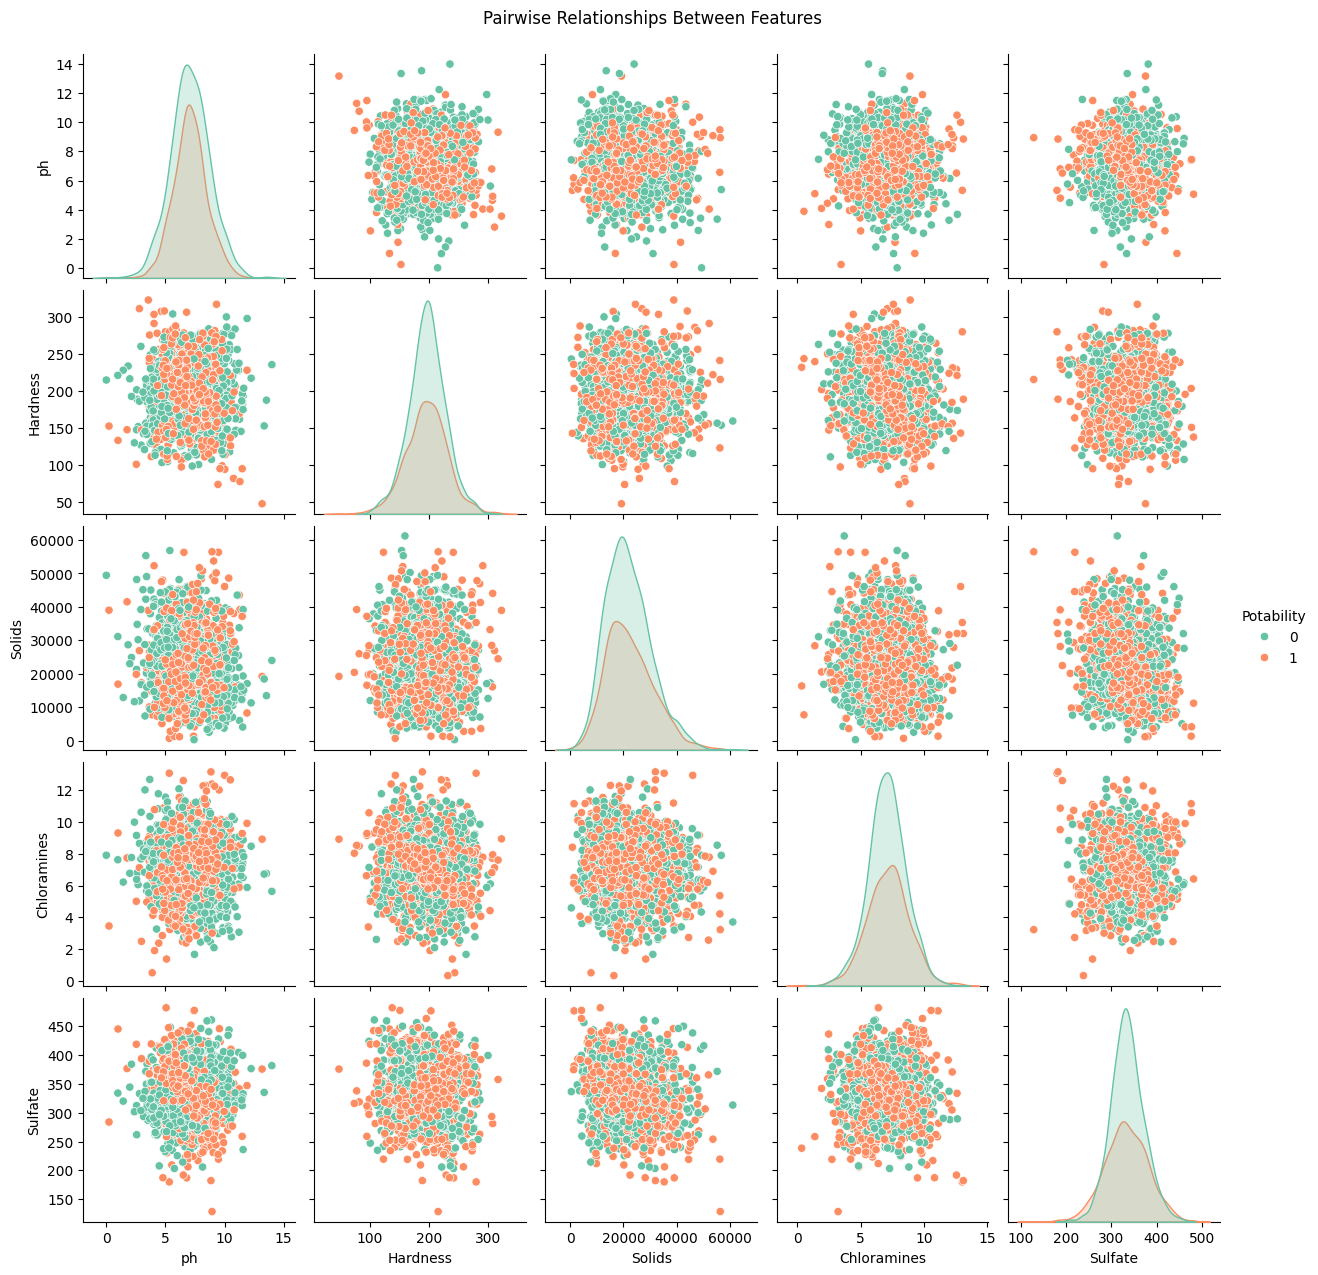

In [26]:
# 📊 Pairwise Relationships (Step: EDA Enhancement)

# Select only a subset of features (to avoid overcrowding if too many columns)
selected_cols = df.select_dtypes(include=['float64', 'int64']).columns[:5]  # pick first 5 numeric features

# Add target column if available
target_col = "Potability"  # change if different
if target_col in df.columns and target_col not in selected_cols:
    selected_cols = list(selected_cols) + [target_col]

# Pairplot
sns.pairplot(df[selected_cols], hue=target_col, diag_kind="kde", palette="Set2")
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

## 11. Insights & Actions
- Summarize main findings:
  - Which features are most important in separating classes?
  - Which features need scaling or transformation?
  - Any data quality issues (missing, outliers, imbalance)?
- Document next steps for preprocessing and modeling.



In [28]:
# 📊 Step 11: Insights & Actions

from collections import Counter

print("=== INSIGHTS & ACTIONS REPORT ===\n")

# 1. Feature importance (using correlation with target)
target_col = "quality_label"  # change if needed
if target_col in df.columns:
    corr_matrix = df.corr(numeric_only=True)
    if target_col in corr_matrix.columns:
        target_corr = corr_matrix[target_col].sort_values(ascending=False)
        print("🔹 Features most correlated with target:\n")
        print(target_corr, "\n")
    else:
        print(f"⚠️ Target '{target_col}' not found in correlation matrix.\n")

# 2. Check scaling needs (look at feature ranges)
print("🔹 Feature Ranges (to detect scaling needs):\n")
feature_ranges = df.describe().loc[["min", "max"]].transpose()
display(feature_ranges)

# 3. Outlier summary (using IQR method again)
outliers_summary = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_summary[col] = df[(df[col] < lower) | (df[col] > upper)].shape[0]

print("🔹 Outlier Counts per Feature:\n")
print(outliers_summary, "\n")

# 4. Missing values check
missing_values = df.isnull().sum()
print("🔹 Missing Values per Feature:\n")
print(missing_values[missing_values > 0], "\n")

# 5. Class balance check
if target_col in df.columns:
    class_counts = Counter(df[target_col])
    print("🔹 Class Balance:\n")
    for k, v in class_counts.items():
        print(f"Class {k}: {v} samples")
    print()




=== INSIGHTS & ACTIONS REPORT ===

🔹 Feature Ranges (to detect scaling needs):



,min,max
ph,0.000000,14.000000
Hardness,47.432000,323.124000
Solids,320.942611,61227.196008
Chloramines,0.352000,13.127000
Sulfate,129.000000,481.030642
Conductivity,181.483754,753.342620
Organic_carbon,2.200000,28.300000
Trihalomethanes,0.738000,124.000000
Turbidity,1.450000,6.739000
Potability,0.000000,1.000000


🔹 Outlier Counts per Feature:

{'ph': 46, 'Hardness': 83, 'Solids': 47, 'Chloramines': 61, 'Sulfate': 41, 'Conductivity': 11, 'Organic_carbon': 25, 'Trihalomethanes': 33, 'Turbidity': 19, 'Potability': 0} 

🔹 Missing Values per Feature:

ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64 



## 🔹 Handle Missing Values
Missing values can reduce data quality. They should be imputed (mean/median/mode) or removed.


In [29]:
# Handle missing values
df_clean = df.copy()
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))  # numeric imputation
df_clean = df_clean.fillna(df_clean.mode().iloc[0])  # categorical imputation
print("✅ Missing values handled")


✅ Missing values handled


## 🔹 Address Outliers
Outliers can skew results. Use statistical methods (IQR, Z-score) or domain knowledge to treat them.


In [30]:
# Remove outliers using IQR method
df_outlier_free = df_clean.copy()
for col in df_outlier_free.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_outlier_free[col].quantile(0.25)
    Q3 = df_outlier_free[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_outlier_free = df_outlier_free[(df_outlier_free[col] >= lower) & (df_outlier_free[col] <= upper)]

print("✅ Outliers addressed. New shape:", df_outlier_free.shape)


✅ Outliers addressed. New shape: (2657, 10)


## 🔹 Apply Feature Scaling/Normalization
Scaling ensures features contribute equally to model performance.


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df_outlier_free.select_dtypes(include=['float64', 'int64']).columns.drop('Potability') # Exclude 'Potability'
df_scaled = df_outlier_free.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("✅ Features scaled using StandardScaler")

✅ Features scaled using StandardScaler


## 🔹 Consider Feature Selection
Use correlation, feature importance, or dimensionality reduction (PCA) to remove irrelevant/redundant features.


In [32]:
# Simple feature selection based on correlation with target
target_col = "quality_label"  # change if different
corr_matrix = df_scaled.corr(numeric_only=True)
if target_col in corr_matrix.columns:
    important_features = corr_matrix[target_col].abs().sort_values(ascending=False)
    print("✅ Features ranked by importance:\n")
    print(important_features)


## 🔹 Balance Classes
If classes are imbalanced, use oversampling, undersampling, or SMOTE.


In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE

target_col = "Potability"  # Corrected target column name

X = df_scaled.drop(columns=[target_col])
y = df_scaled[target_col]

print("Before balancing:", Counter(y))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("After balancing:", Counter(y_res))

Before balancing: Counter({0: 1664, 1: 993})
After balancing: Counter({0: 1664, 1: 1664})


## 🔹 Move to Model Training & Evaluation
After preprocessing, proceed with:
- Splitting data into train/test sets
- Applying ML algorithms (Logistic Regression, Random Forest, etc.)
- Evaluating performance (accuracy, precision, recall, F1-score)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train a simple model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print("✅ Model Evaluation Report:\n")
print(classification_report(y_test, y_pred))


✅ Model Evaluation Report:

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       335
           1       0.72      0.68      0.70       331

    accuracy                           0.71       666
   macro avg       0.71      0.71      0.71       666
weighted avg       0.71      0.71      0.71       666

